In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#### We have 5 columns and 5000+ messages

#### Tasks to be performed:
1. Data Cleaning
2. EDA (Exploratory data analysis)
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# We will drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#As it is a peramanet operation inplace will be equal to true

In [7]:
#Renaming the first two columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# We will encode spam and ham as 1 and 0.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Ham is encoded as 0 and spam as 1.

In [13]:
#Checking Missing Calues
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#Check for duplicate values
df.duplicated().sum()

403

In [15]:
#Removing duplicates from df
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2. EDA

In [18]:
#Let's Check the ratio of spam and ham in dataframe
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

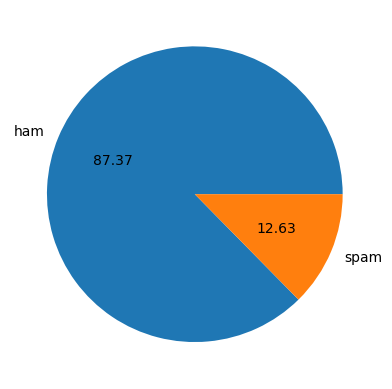

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### Data is imbalanced

In [20]:
!pip install nltk

In [21]:
import nltk

The Punkt tokenizer is a pre-trained unsupervised machine learning model for tokenizing sentences in natural language text.
Tokenization is the process of breaking down a text into individual words or sentences. NLTK provides various tokenizers for different tasks, and the Punkt tokenizer is particularly useful for splitting text into sentences.

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#Get length of each text (no. of characters)
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#Number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#Number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# If we describe only the 'ham' target
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# If we describe only the 'spam' target
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Spam has more average than ham in terms of characters,words and sentences.

In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

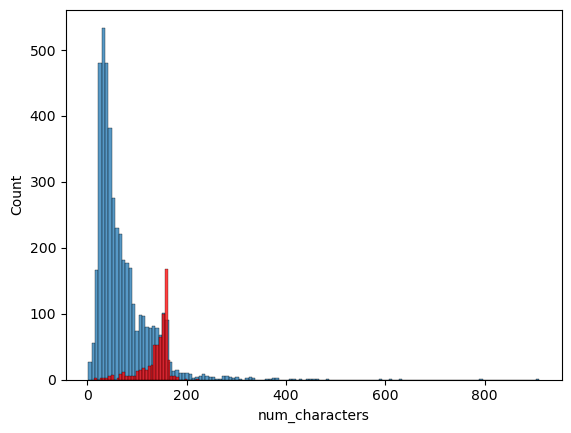

In [33]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

Number of characters used in ham messages is less as compared to spam messages.

<Axes: xlabel='num_words', ylabel='Count'>

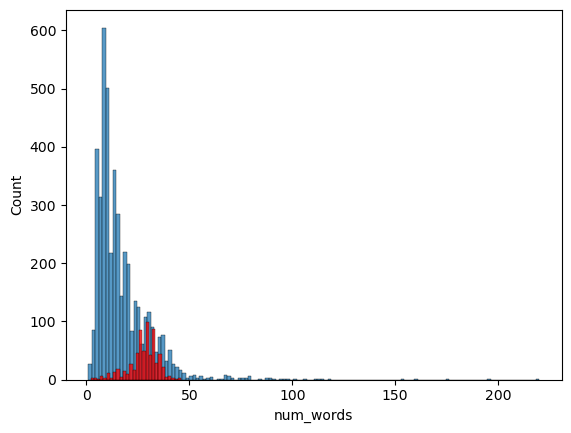

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

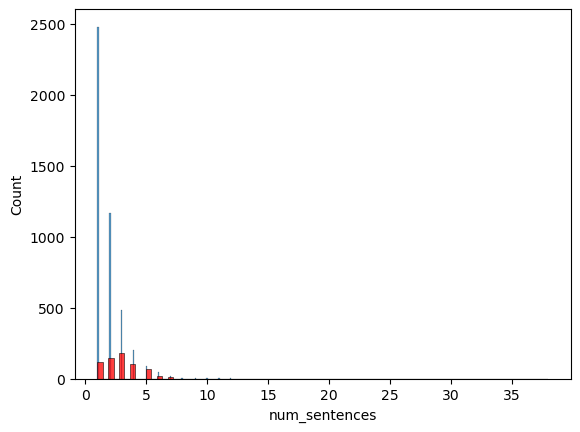

In [35]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

Same conclusion is seen in case of words and sentences. Ham has less weightage than spam.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


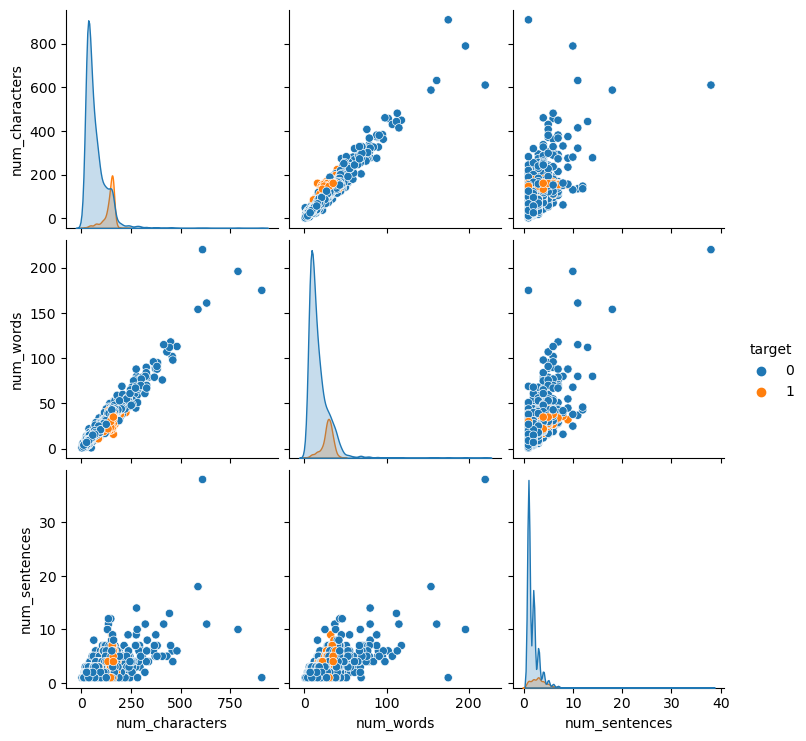

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

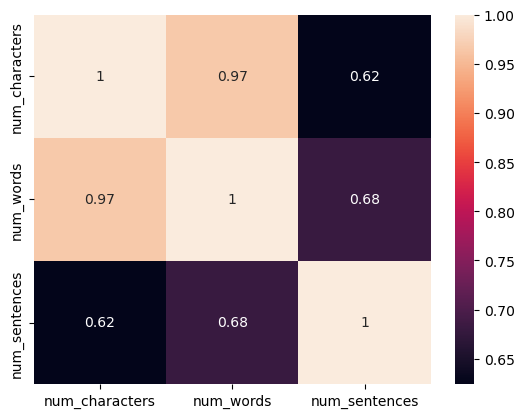

In [37]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(),annot=True)

There is a highest correlation between number of words and number of characters.

We will take help of num_characters to create a model.

## 3. Data Preprocessing
* Lower case
* Tokenisation
* Removing Special Characters
* Removing stop words and punctuation
* Stemming

### Tokenisation:

Tokenization is the process of breaking down a text document or a piece of text into smaller units, typically words or sentences. These smaller units are called tokens.

There are two main types of tokenization:
1. Word Tokenization:

For example, given the sentence "The quick brown fox jumps over the lazy dog", word tokenization would produce the following tokens: ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"].
2. Sentence Tokenization:

For example, given the paragraph "This is the first sentence. This is the second sentence! And here is the third sentence?", sentence tokenization would produce the following tokens: ["This is the first sentence.", "This is the second sentence!", "And here is the third sentence?"].


### Stemming:
Stemming is the process of reducing words to their base or root forms. The main idea behind stemming is to normalize words so that variations of the same word are treated as the same word, despite their different inflections or derivations.
For example, consider the following words:

"running"
"runs"
"runner"
"ran"
A stemming algorithm might reduce all of these words to the stem "run", ignoring their different forms. This allows the algorithm to treat variations of the word "run" as the same word, which can be useful for tasks where word forms are less important than their underlying meanings.

In [38]:
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopwords.words('english') 
#The output is the stopwords. Stopwords doesn't adds meaning to the sentence, they help in the formation of sentences

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
#Puntuations:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [43]:
# A function that will perform all these processes
def transform_text(text):
    text=text.lower() #converting text into lower alphabets
    text=nltk.word_tokenize(text) #tokenisng text
    
    #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    #removing stopwords and punctuation
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [44]:
#Example
transform_text("I loved the youtube lectures on machine learning. How about you? &")

'love youtub lectur machin learn'

In [45]:
#create a new column for transformed text

df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


####  Generating Word Cloud

In [46]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
#SPAM WORD CLOUD
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

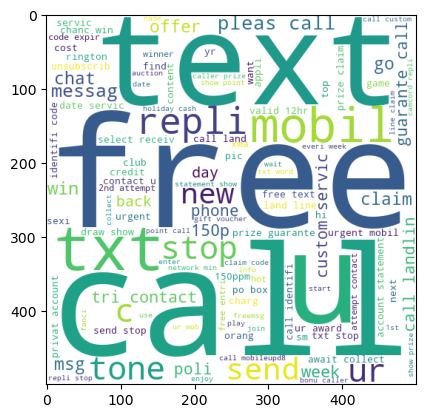

In [49]:
plt.imshow(spam_wc)

In [50]:
# HAM WORD CLOUD
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

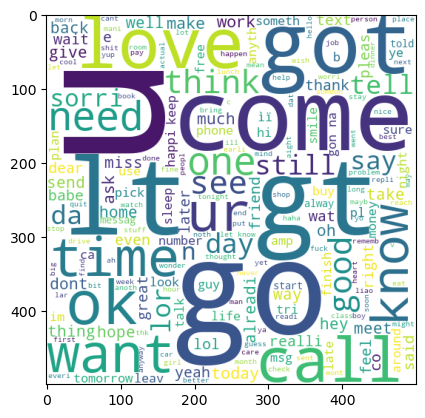

In [51]:
plt.imshow(ham_wc)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
# The counter will create a dictionary give the count of each word as a value
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [56]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [57]:
# Adding these in a  data frame
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [58]:
df_most_common_spam=pd.DataFrame(Counter(spam_corpus).most_common(30))

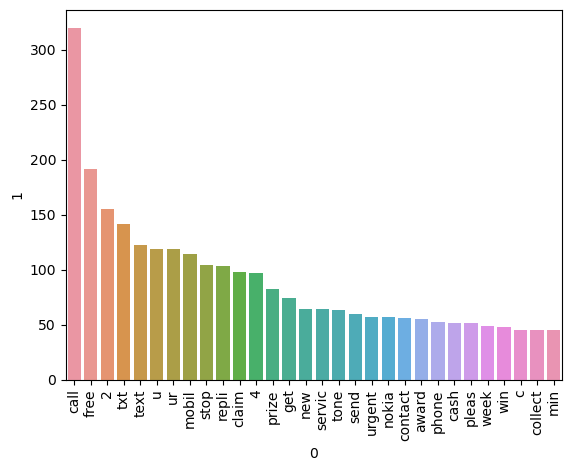

In [59]:
sns.barplot(x=df_most_common_spam[0],y=df_most_common_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

In [62]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [63]:
df_most_common_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))

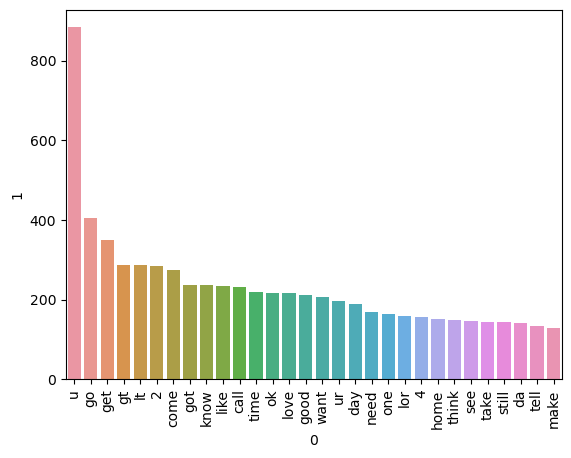

In [64]:
sns.barplot(x=df_most_common_ham[0],y=df_most_common_ham[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [65]:
# We will be using naive bayes algorithm. It is said to be the most effective algo for textual data.
# As the numerical value if needed for naive bayes to perform mathematical operation.
# We will convert text into vectors

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
#Convert a collection of raw documents to a matrix of TF-IDF features.
tfid=TfidfVectorizer()

In [67]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y = df['target'].values

In [70]:
print(y)
print(y.shape)

[0 0 1 ... 0 0 0]
(5169,)


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
# gnb.fit(X_train,y_train)
# y_pred1=gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [74]:
# mnb.fit(X_train,y_train)
# y_pred2=mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [75]:
# bnb.fit(X_train,y_train)
# y_pred3=bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [76]:
# USING TFIDF 

In [77]:
# Xf=tfid.fit_transform(df['transformed_text']).toarray()

In [78]:
# y = df['target'].values

In [79]:
# X_trainf,X_testf,y_trainf,y_testf = train_test_split(Xf,y,test_size=0.2,random_state=2)

In [80]:
# gnb.fit(X_trainf,y_trainf)
# y_pred1=gnb.predict(X_testf)
# print(accuracy_score(y_testf,y_pred1))
# print(confusion_matrix(y_testf,y_pred1))
# print(precision_score(y_testf,y_pred1))

In [81]:
# mnb.fit(X_trainf,y_trainf)
# y_pred2=mnb.predict(X_testf)
# print(accuracy_score(y_testf,y_pred2))
# print(confusion_matrix(y_testf,y_pred2))
# print(precision_score(y_testf,y_pred2))

In [82]:
# bnb.fit(X_trainf,y_trainf)
# y_pred3=bnb.predict(X_testf)
# print(accuracy_score(y_testf,y_pred3))
# print(confusion_matrix(y_testf,y_pred3))
# print(precision_score(y_testf,y_pred3))

In [83]:
# We will go with multinomial naive bayes on  tfidf vectorizer. 
#The metric of consideration will be precison as tha data is imbalanced. SO the precision will matter the most.

## IMPROVING THE MODEL

In [84]:
# pip install xgboost

In [85]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [86]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# # knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
# #Classifiers
# clfs = {
#     'SVC' : svc,
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }


In [88]:
# # Function to train a model
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [89]:
# #Let's train on svc
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [90]:
# Accuracy and precision score for each model in clfs
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [91]:
# #Storing them in a data frame
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

## max_features =3000 on tfidf for improved result

In [92]:
tfidf=TfidfVectorizer(max_features=3000)
Xmf=tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_trainmf,X_testmf,y_trainmf,y_testmf = train_test_split(Xmf,y,test_size=0.2,random_state=2)

In [93]:
gnb.fit(X_trainmf,y_trainmf)
y_pred1=gnb.predict(X_testmf)
print(accuracy_score(y_testmf,y_pred1))
print(confusion_matrix(y_testmf,y_pred1))
print(precision_score(y_testmf,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [94]:
mnb.fit(X_trainmf,y_trainmf)
y_pred1=mnb.predict(X_testmf)
print(accuracy_score(y_testmf,y_pred1))
print(confusion_matrix(y_testmf,y_pred1))
print(precision_score(y_testmf,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [95]:
bnb.fit(X_trainmf,y_trainmf)
y_pred1=bnb.predict(X_testmf)
print(accuracy_score(y_testmf,y_pred1))
print(confusion_matrix(y_testmf,y_pred1))
print(precision_score(y_testmf,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


The accuracy of mnb is imporved after using max_feature hyperparameter in tfdif. This is the most suitable model as it has better accuracy and a precision of 1.

In [96]:
#These lines save the trained TF-IDF vectorizer (tfidf) and the trained machine learning model (mnd)
#to files so that they can be reused later without having to retrain or recreate them.
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb')) # wb: binary mode